In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("music_genre.csv")

In [3]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

## missing value in all data

In [5]:
df[df["instance_id"].isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(inplace=True)

## target

In [7]:
df["music_genre"].value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

<AxesSubplot:xlabel='music_genre', ylabel='count'>

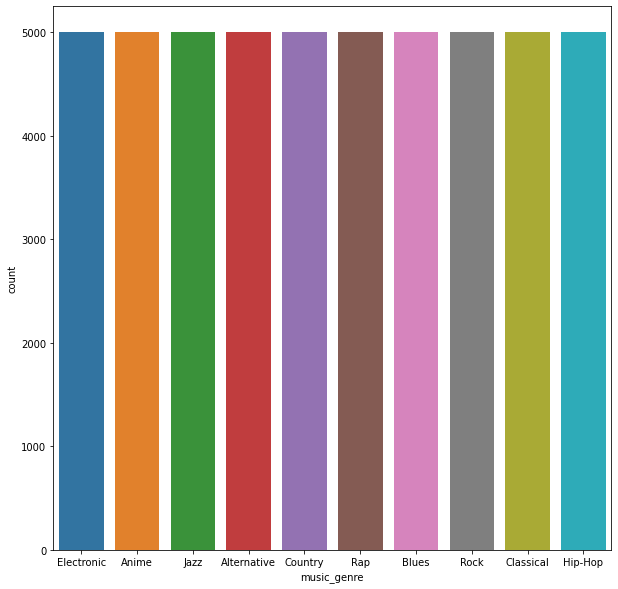

In [8]:
plt.figure(figsize =(10,10))
sns.countplot(data=df,x="music_genre")

## features

In [9]:
df["artist_name"].nunique()

6863

In [10]:
df["track_name"].nunique()

41699

In [11]:
df["key"].nunique()

12

In [12]:
df["mode"].value_counts()

Major    32099
Minor    17901
Name: mode, dtype: int64

In [13]:
df.drop(columns=["instance_id","track_name","obtained_date","artist_name","tempo","key"],inplace=True)

In [14]:
df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,Minor,0.0748,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,Minor,0.0300,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,Major,0.0345,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,Major,0.2390,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,Major,0.0413,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,0.119,-7.022,Major,0.2980,0.330,Hip-Hop
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,Major,0.0550,0.113,Hip-Hop
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,Major,0.1460,0.395,Hip-Hop
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,Minor,0.0441,0.354,Hip-Hop


In [15]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [16]:
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,Minor,0.0748,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,Minor,0.0300,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,Major,0.0345,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,Major,0.2390,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,Major,0.0413,0.323,Electronic


In [17]:
x=df.drop("music_genre",axis=1)
y=df["music_genre"]

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   liveness          50000 non-null  float64
 7   loudness          50000 non-null  float64
 8   mode              50000 non-null  object 
 9   speechiness       50000 non-null  float64
 10  valence           50000 non-null  float64
dtypes: float64(10), object(1)
memory usage: 4.6+ MB


In [19]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [20]:
x_train

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,valence
39092,52.0,0.014600,0.505,276840.0,0.687,0.021800,0.1890,-5.174,Minor,0.0288,0.0473
30898,32.0,0.753000,0.304,-1.0,0.309,0.000000,0.1150,-11.466,Major,0.0292,0.3480
45283,65.0,0.411000,0.787,210862.0,0.586,0.000311,0.1180,-9.640,Major,0.0695,0.5810
16403,44.0,0.000160,0.418,-1.0,0.966,0.005690,0.2220,-2.656,Minor,0.2130,0.5830
13658,48.0,0.111000,0.412,337733.0,0.657,0.000088,0.1500,-11.780,Major,0.0887,0.7420
...,...,...,...,...,...,...,...,...,...,...,...
11289,43.0,0.071700,0.513,265665.0,0.763,0.919000,0.1640,-7.425,Minor,0.0570,0.5320
44737,42.0,0.024100,0.276,415920.0,0.726,0.818000,0.0927,-6.678,Minor,0.0469,0.2720
38163,64.0,0.458000,0.400,109707.0,0.818,0.000003,0.1320,-11.238,Major,0.0800,0.9360
860,27.0,0.110000,0.523,228706.0,0.904,0.269000,0.2910,-3.038,Minor,0.6080,0.5110


In [21]:
numeric_columns = x_train.select_dtypes(exclude='object').columns
numeric_columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence'],
      dtype='object')

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
numeric_feature = Pipeline(steps=[('handlingmissing',SimpleImputer(strategy='median')),('scaling',StandardScaler(with_mean=False))])

In [23]:
cat_columns = x_train.select_dtypes(include='object').columns
cat_columns

Index(['mode'], dtype='object')

In [24]:
from sklearn.preprocessing import OneHotEncoder
cat_feature = Pipeline(steps = [('missing',SimpleImputer(strategy='most_frequent')),('encoding',OneHotEncoder()),('scaling',StandardScaler(with_mean=False))])

In [25]:
cat_feature

Pipeline(steps=[('missing', SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])

In [26]:
from sklearn.compose import ColumnTransformer
processing = ColumnTransformer([('numeic',numeric_feature,numeric_columns),
                                ('cat', cat_feature, cat_columns)])

In [27]:
processing

ColumnTransformer(transformers=[('numeic',
                                 Pipeline(steps=[('handlingmissing',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('missing',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                       

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [29]:
y_train.isna().sum()

0

In [30]:
final_pipe = Pipeline(steps = [('processing',processing),('modeling',SVC())])

In [31]:
print(final_pipe)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeic',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('missing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  

In [32]:
final_pipe.fit(x_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeic',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('missing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  

In [33]:
final_pipe.fit(x_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeic',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('missing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  

In [34]:
final_pipe.fit(x_train,y_train).score(x_train,y_train)

0.574275

In [35]:
final_pipe.fit(x_train,y_train).score(x_test,y_test)

0.5658

In [36]:
import joblib
model_save =  joblib.dump(final_pipe,'modeln.pkl')

In [ ]:
%%writefile application.py
import numpy as np
import pandas as pd
import streamlit as st 
import joblib

classifier=joblib.load('modeln.pkl')


def welcome():
    return "Welcome All"


def predict_musicgenere(popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,valence):

    prediction=classifier.predict(pd.DataFrame({'popularity':[popularity],'acousticness':[acousticness],"danceability":[danceability],"duration_ms":[duration_ms],'energy':[energy],'instrumentalness':[instrumentalness],'liveness':[liveness],"loudness":[loudness],"mode":[mode],"speechiness":[speechiness],"valence":[valence]}))

    return prediction
  
      
def main():
    st.title("Titanic")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit music_genere ML App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    popularity= st.text_input("popularity","Type Here")
    acousticness= st.text_input("acousticness","Type Here")
    danceability= st.text_input("danceability","Type Here")
    duration_ms = st.text_input("duration_ms","Type Here")
    energy= st.text_input("energy","Type Here")
    instrumentalness= st.text_input("instrumentalness","Type Here")
    liveness= st.text_input("liveness","Type Here")
    loudness= st.text_input("loudness","Type Here")
    mode= st.text_input("mode","Type Here")
    speechiness= st.text_input("speechiness","Type Here")
    valence= st.text_input("valence","Type Here")
    
    result=""
    if st.button("Predict"):
        result=predict_musicgenere(popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,valence)
    st.success('The output is {}'.format(result))
    if st.button("About"):
        st.text("Lets LEarn")
        st.text("Built with Streamlit")
if __name__=='__main__':
    main()        
